In [1]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
        print(i, total)
    return total

In [2]:
mylist = [1,2,3,5,8,2,3,7]
total(mylist)

0 1
1 3
2 6
3 11
4 19
5 21
6 24
7 31


31

In [3]:
len(mylist)

8

In [4]:
def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    if n % 2 != 0:
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
        
    return median_

def mode(list_obj):
    max_count = 0
    counter_dict = {}
    for value in list_obj:
        counter_dict[value] = 0
    for value in list_obj:
        counter_dict[value] += 1
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    list_mean = mean(list_obj)
    n = len(list_obj)
    sum_sq_diff = 0
    for val in list_obj:
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        variance_ = sum_sq_diff / n
    else:
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    if n1 == n2:
        n = n1
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        else:
            cov = cov / (n - 1)
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    

def correlation(list_obj1, list_obj2):
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)
        
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

In [5]:
def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),2)
        dct[key]["median"] = round(median(val),2)
        dct[key]["variance"] = round(variance(val, sample),2)
        dct[key]["S.D."] = round(SD(val, sample) ,2)
        dct[key]["skewness"] = round(skewness(val, sample),2)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),2)
    stats_df = pd.DataFrame(dct)
    return stats_df

In [6]:
!pip install pandas-datareader --user

In [7]:
import pandas as pd
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2012, 1 , 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["MSFT", "AAPL", "FB", "TSLA"]
for key in stocks:
    data_dict[key] = web.DataReader(key, 'yahoo', start, end)

In [8]:
close_data = pd.concat([val["Close"] for val in data_dict.values()], 
                       keys = data_dict.keys(), 
                       axis = 1)
close_data

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,26.770000,14.686786,NaN,5.616000
2012-01-04,27.400000,14.765714,NaN,5.542000
2012-01-05,27.680000,14.929643,NaN,5.424000
2012-01-06,28.110001,15.085714,NaN,5.382000
2012-01-09,27.740000,15.061786,NaN,5.450000
...,...,...,...,...
2021-09-24,299.350006,146.919998,352.959991,774.390015
2021-09-27,294.170013,145.369995,353.579987,791.359985
2021-09-28,283.519989,141.910004,340.649994,777.559998


<ipython-input-9-9c44e9bb51ad>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


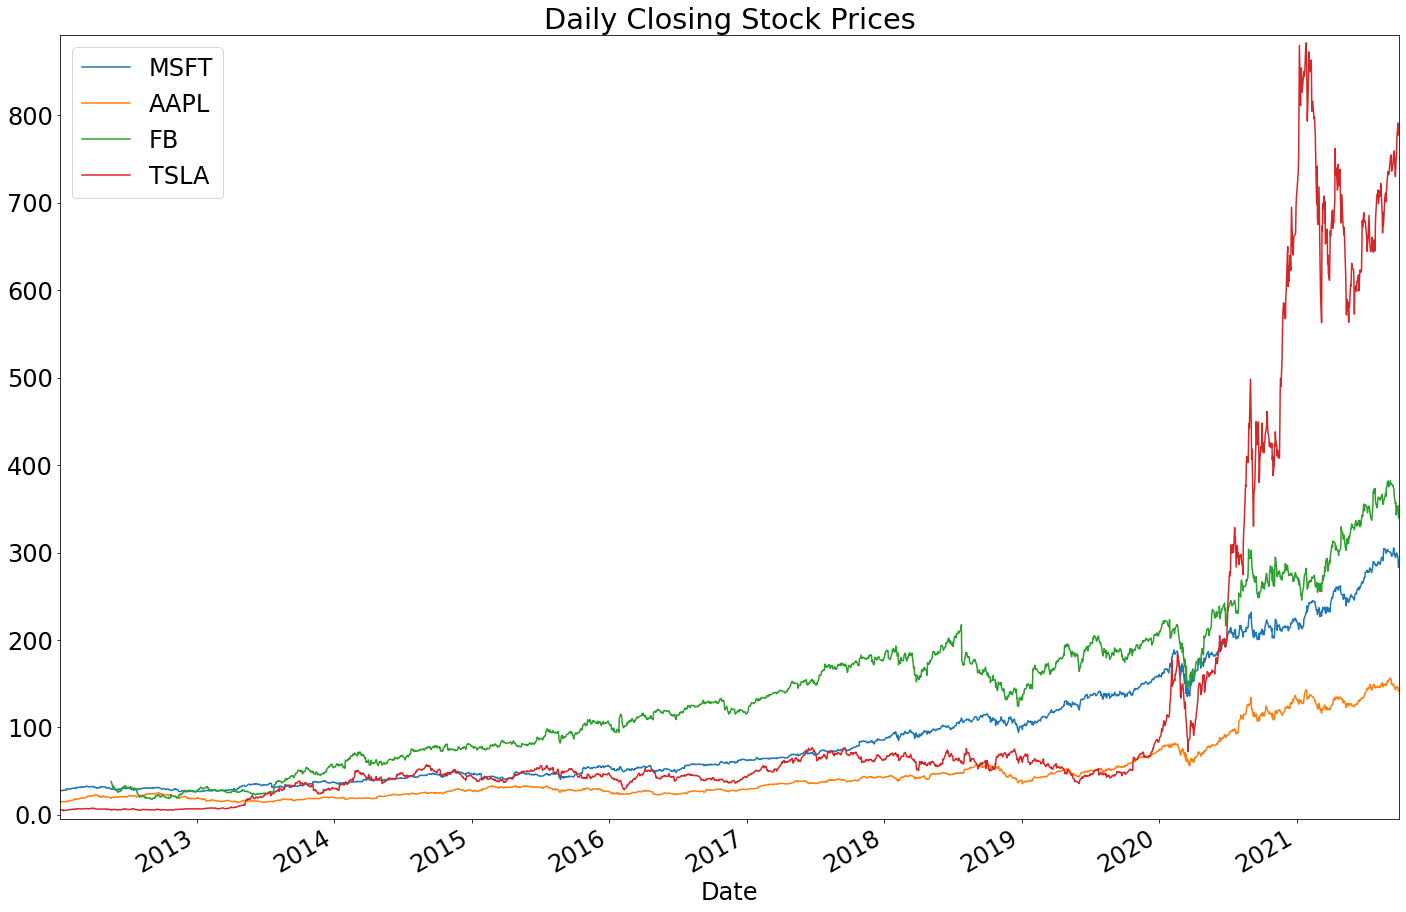

In [9]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 24})
plt.rcParams['axes.xmargin']=0
plt.rcParams['axes.ymargin']=0.01
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Daily Closing Stock Prices")
plt.show()
plt.close()

<ipython-input-10-44f146b862ef>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


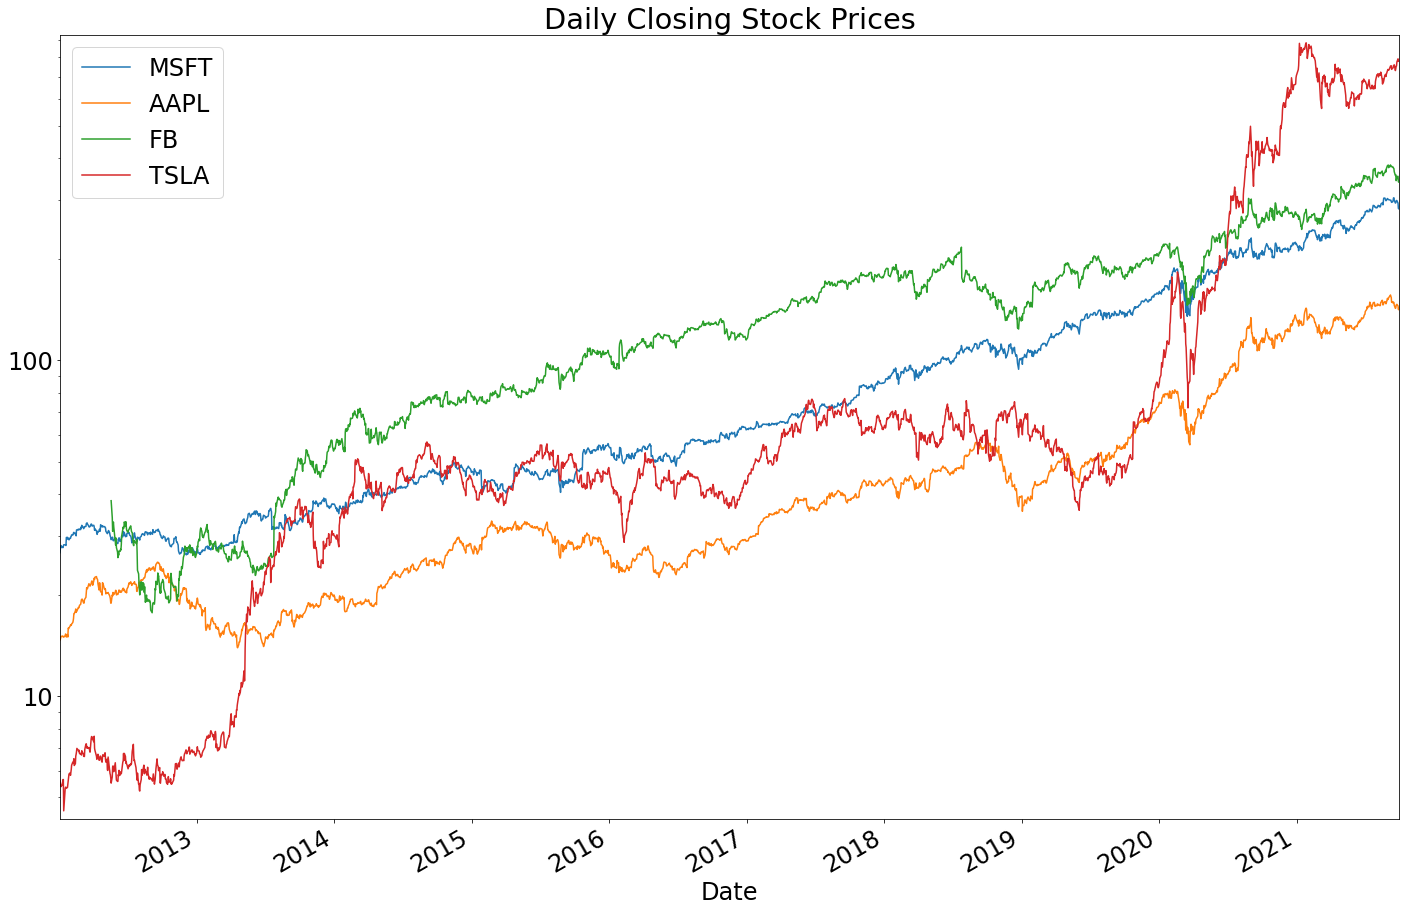

In [10]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 24})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
ax.set_yscale("log")
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Daily Closing Stock Prices")
plt.show()
plt.close()

In [11]:
price_change_data = close_data.pct_change() * 100

<ipython-input-12-e050fc1f217a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


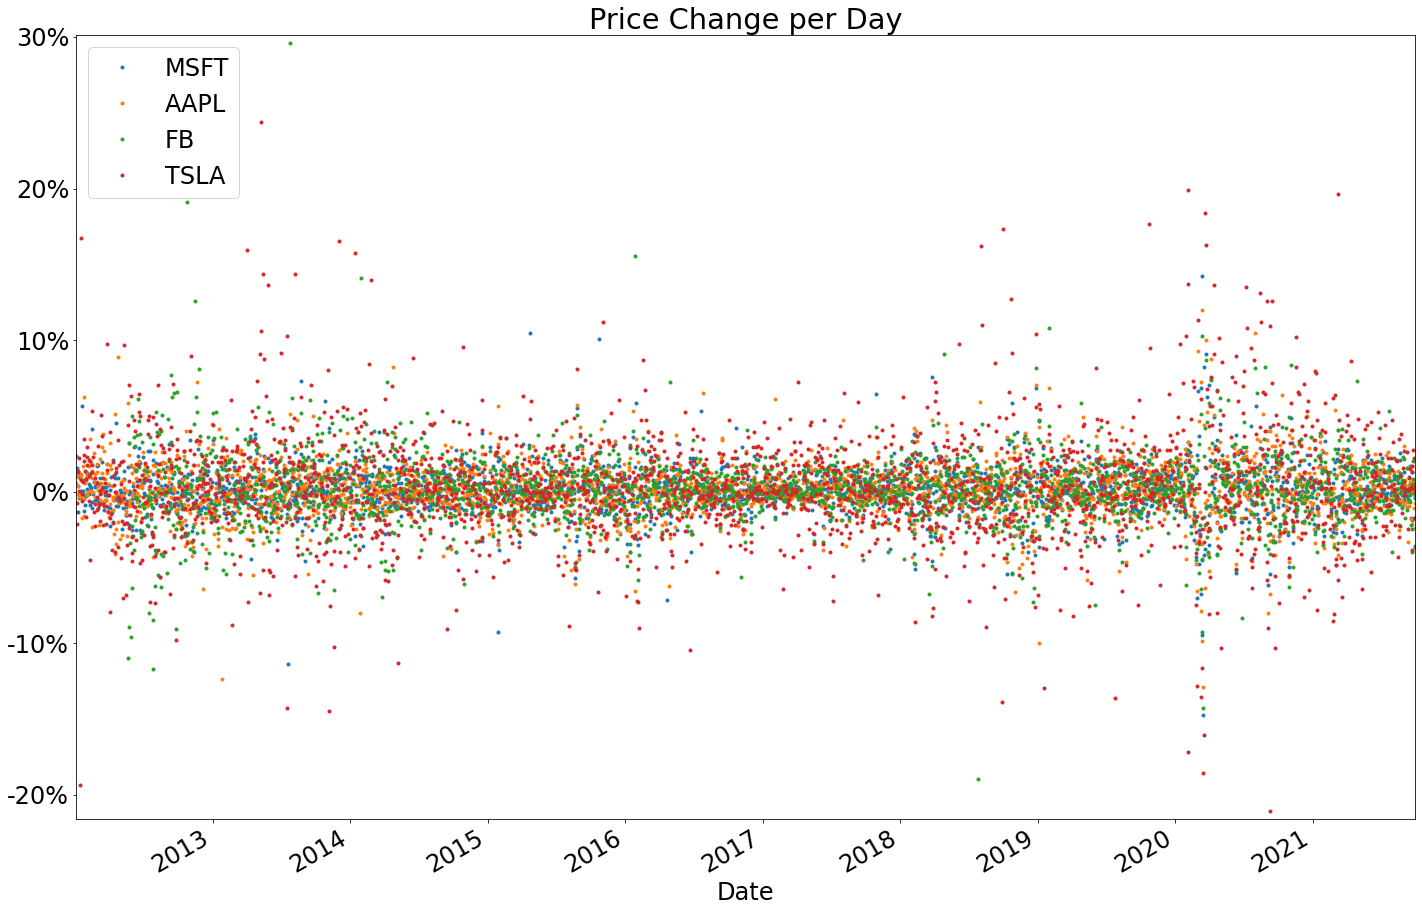

In [12]:
plt.rcParams.update({'font.size': 24})
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Price Change per Day")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

In [13]:
stats_df = gather_statistics(price_change_data, sample = True)
stats_df

0 2.353377474761653
1 3.375277805213295
2 4.928747098692221
3 3.612486582151553
4 3.9729782270499947
5 3.54194073216606
6 4.55204424436425
7 5.44490138722139
8 5.480300427511075
9 5.374140886100853
10 4.9844890802680055
11 10.638821220332773
12 10.706140164728573
13 9.394335941205535
14 10.144163181186272
15 9.941187988268862
16 9.02593219923946
17 10.32597008520024
18 10.055791354848962
19 11.274886155499395
20 11.475626786199431
21 12.443903917389218
22 12.31163206394524
23 12.80831952997455
24 13.829734561427582
25 14.188510200367606
26 13.311030662678654
27 13.573325494501795
28 12.494189050651658
29 11.83302950374437
30 15.959491100913088
31 15.831651809264187
32 16.439653518248573
33 15.898940816574822
34 16.218737362803843
35 16.569386709505036
36 16.156428759514647
37 17.81512238451069
38 17.40721192109082
39 19.14004477671564
40 18.48969148306902
41 17.616865491759107
42 16.86214921227423
43 17.74935038902859
44 18.28326423365994
45 18.220788284070192
46 18.37709070597369
47 2

,MSFT,AAPL,FB,TSLA
mean,0.11,0.11,0.12,0.26
median,0.07,0.08,0.11,0.13
variance,2.60,3.22,5.38,12.26
S.D.,1.61,1.79,2.32,3.50
skewness,0.05,-0.12,0.94,0.43
kurtosis,10.76,6.44,18.59,6.25


<ipython-input-14-45efc7f2e078>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])


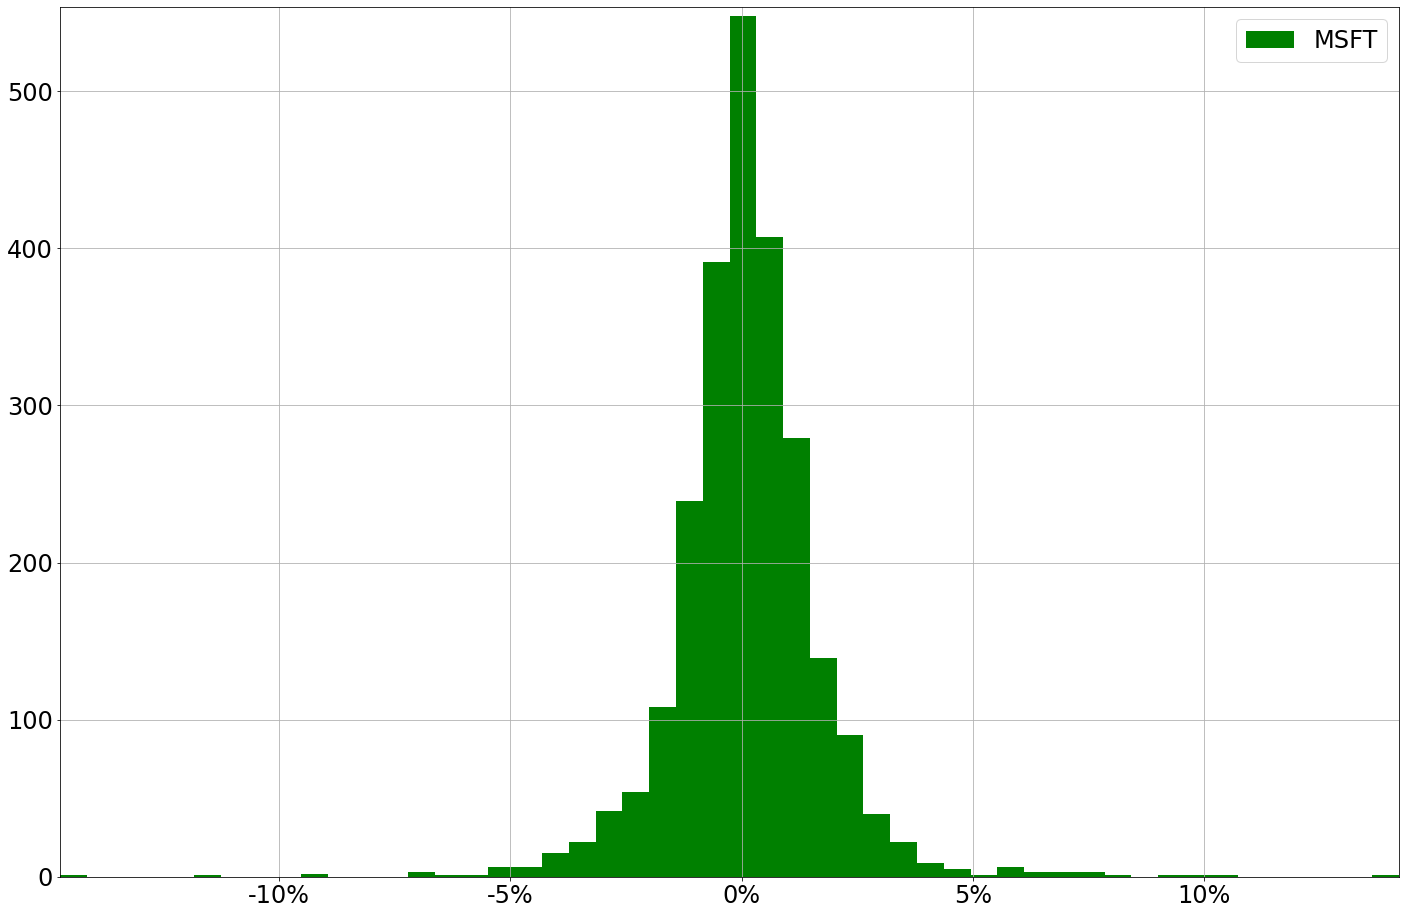

In [14]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["MSFT"].hist(color = "green",bins = 50, label = "MSFT")
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
plt.legend()

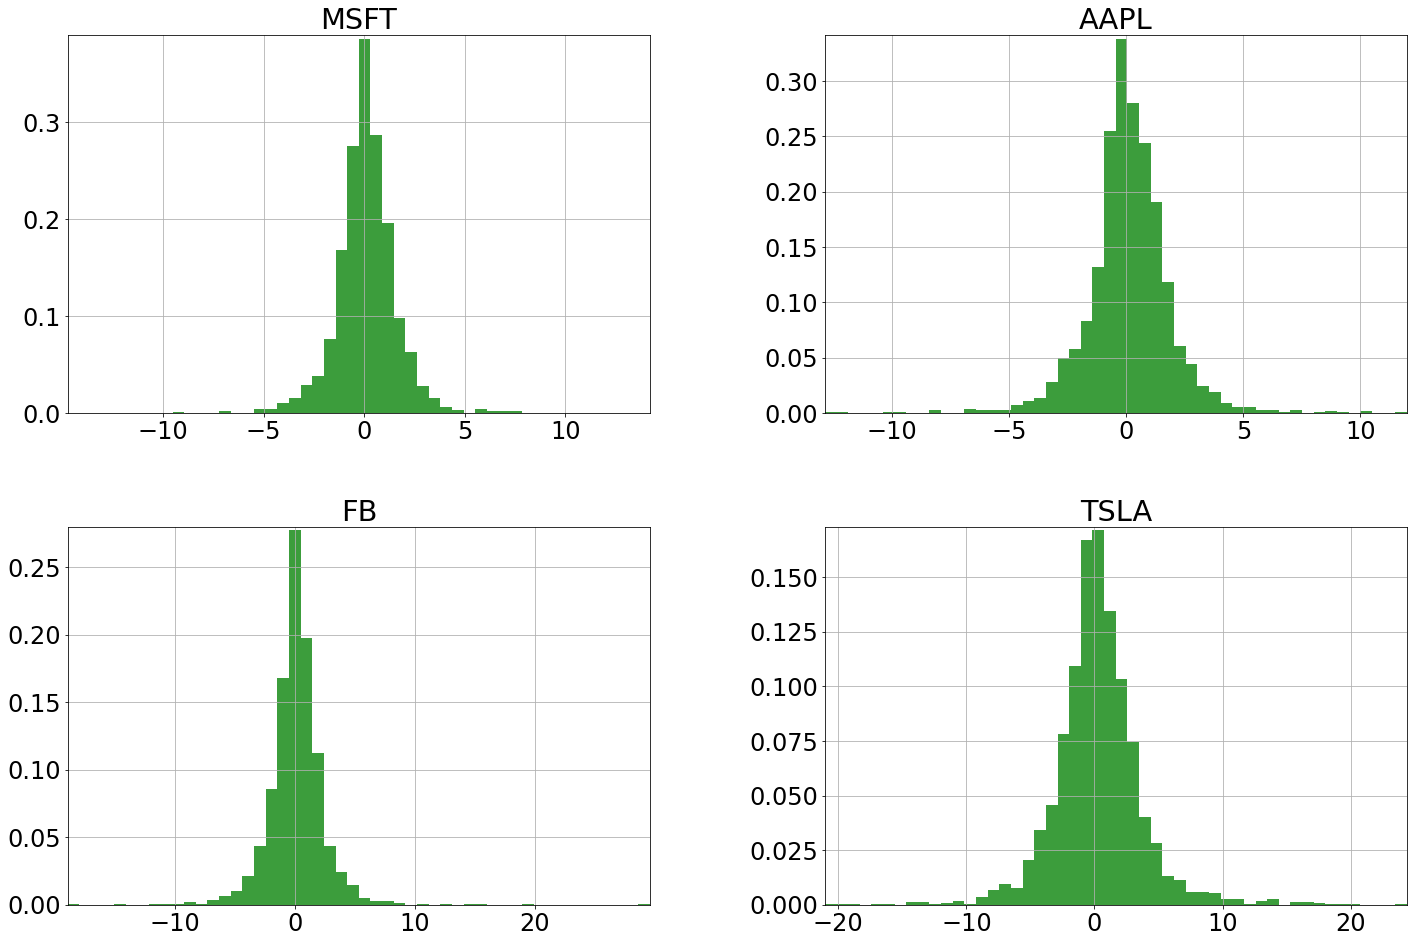

In [15]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
for key in price_change_data:
    price_change_data.hist(color = "green",
                           bins = 50,
                           alpha = .3,
                           label = price_change_data.keys(),
                           ax = ax, 
                           density = True)

<ipython-input-16-3a4dbece5759>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-16-3a4dbece5759>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


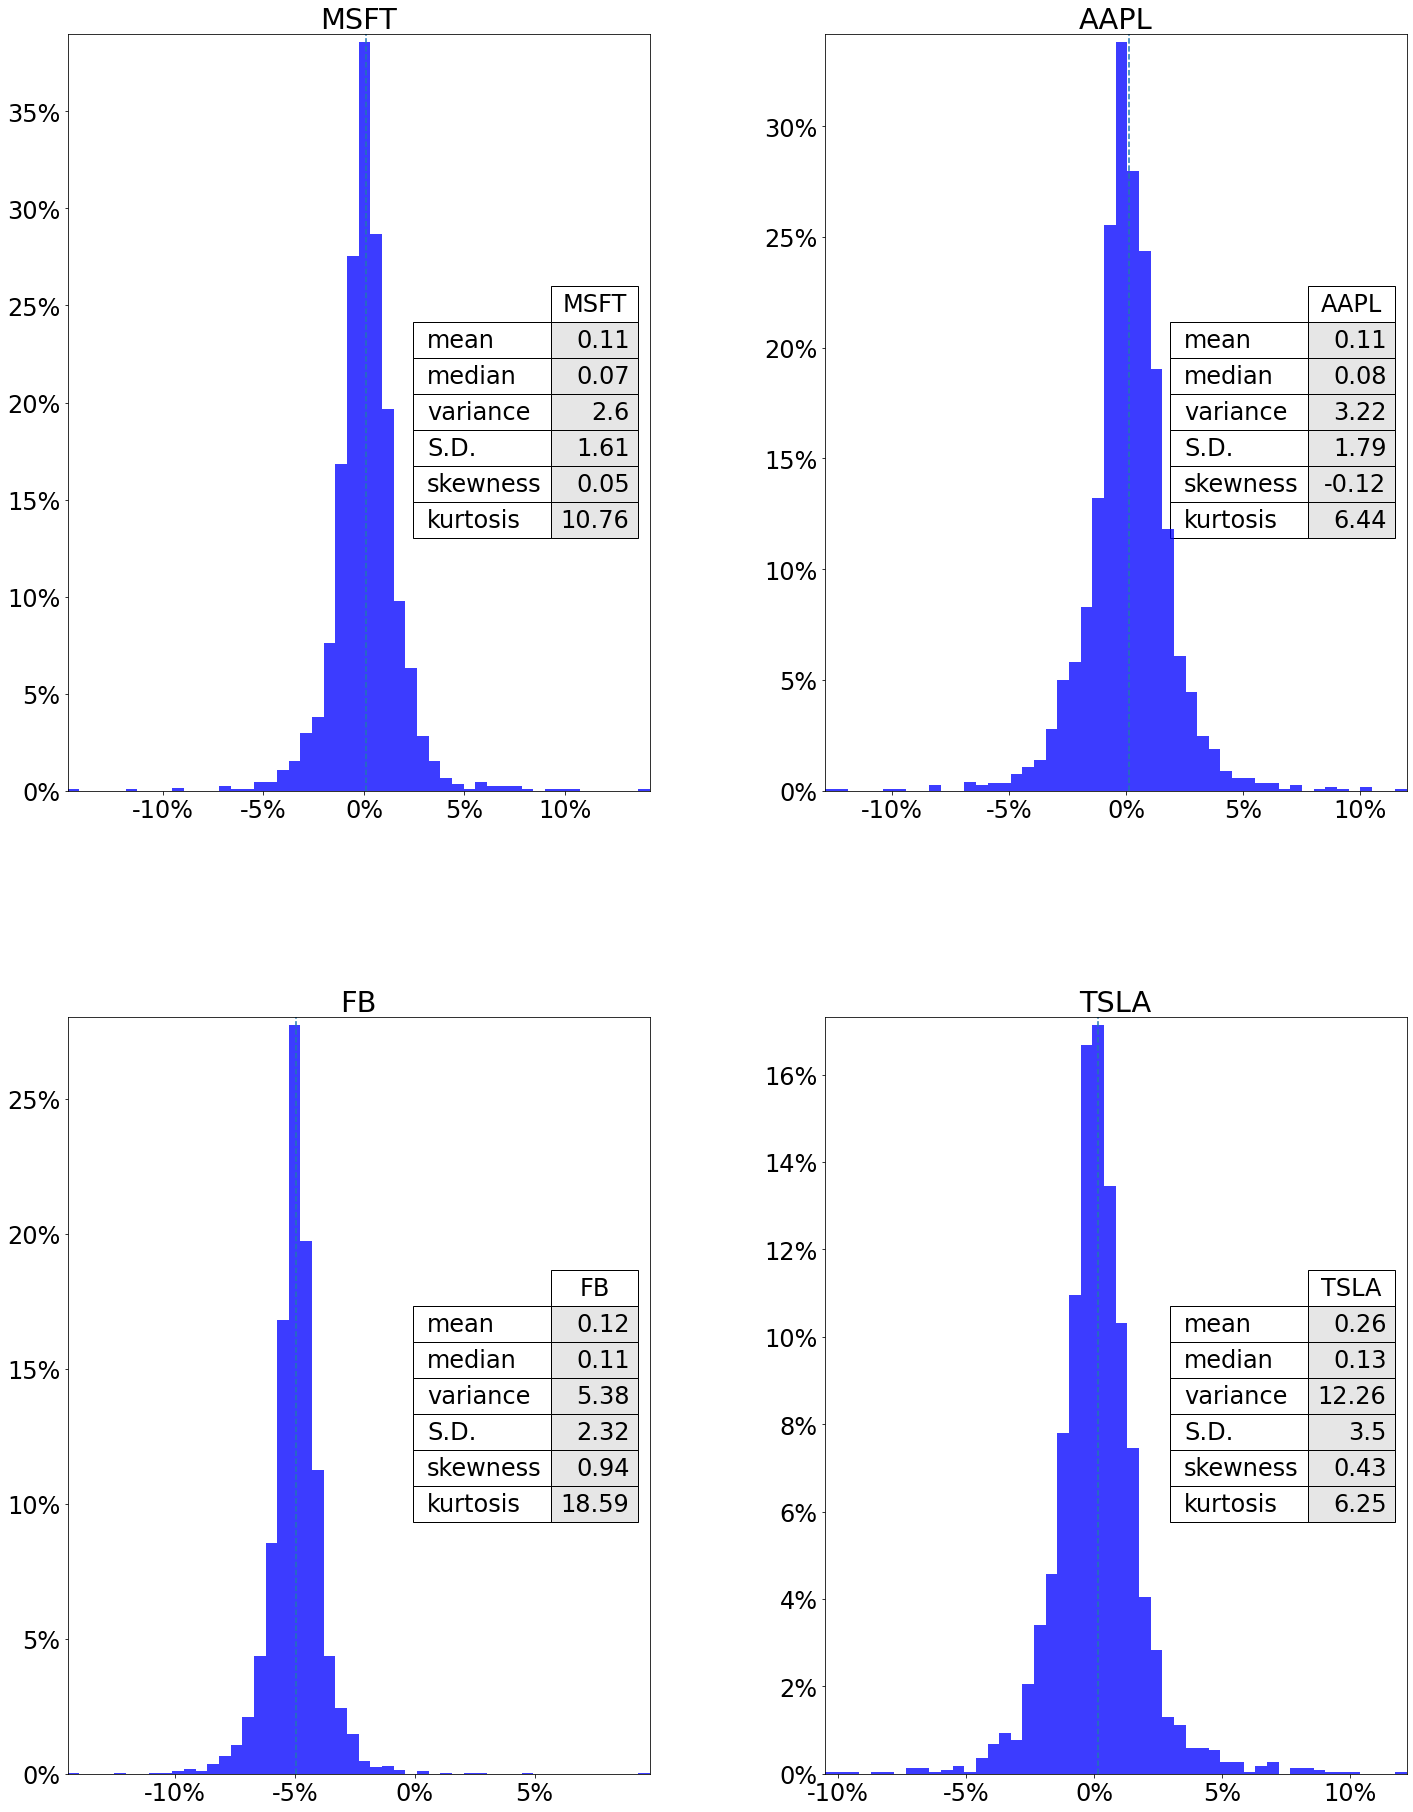

In [16]:
from pandas.plotting import table

fig, ax = plt.subplots(2,2, figsize = (24,32))
for key in price_change_data:
    price_change_data.hist(color = "blue",
                           bins = 50,
                           alpha = .3,
                           label = price_change_data.keys(),
                           ax = ax,
                           density = True)

for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax[i][j]
        stock = a.get_title()
        hist_data = stats_df[stock] 
        stats = table(a,
                      hist_data,
                      colWidths=[.1],
                      cellColours=[[(.9,.9,.9)]]*6,
                      loc = "center right")
        stats.scale(1.5,3)
        stats.auto_set_font_size(False)
        stats.set_fontsize(24)
        a.axvline(x = hist_data.loc["mean"], ls="--")
        a.set_xticklabels([str(int(x))+ "%" for x in x_vals])   
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])
        a.grid(False)

   
plt.show()

<ipython-input-17-52b218bb3f51>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-17-52b218bb3f51>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


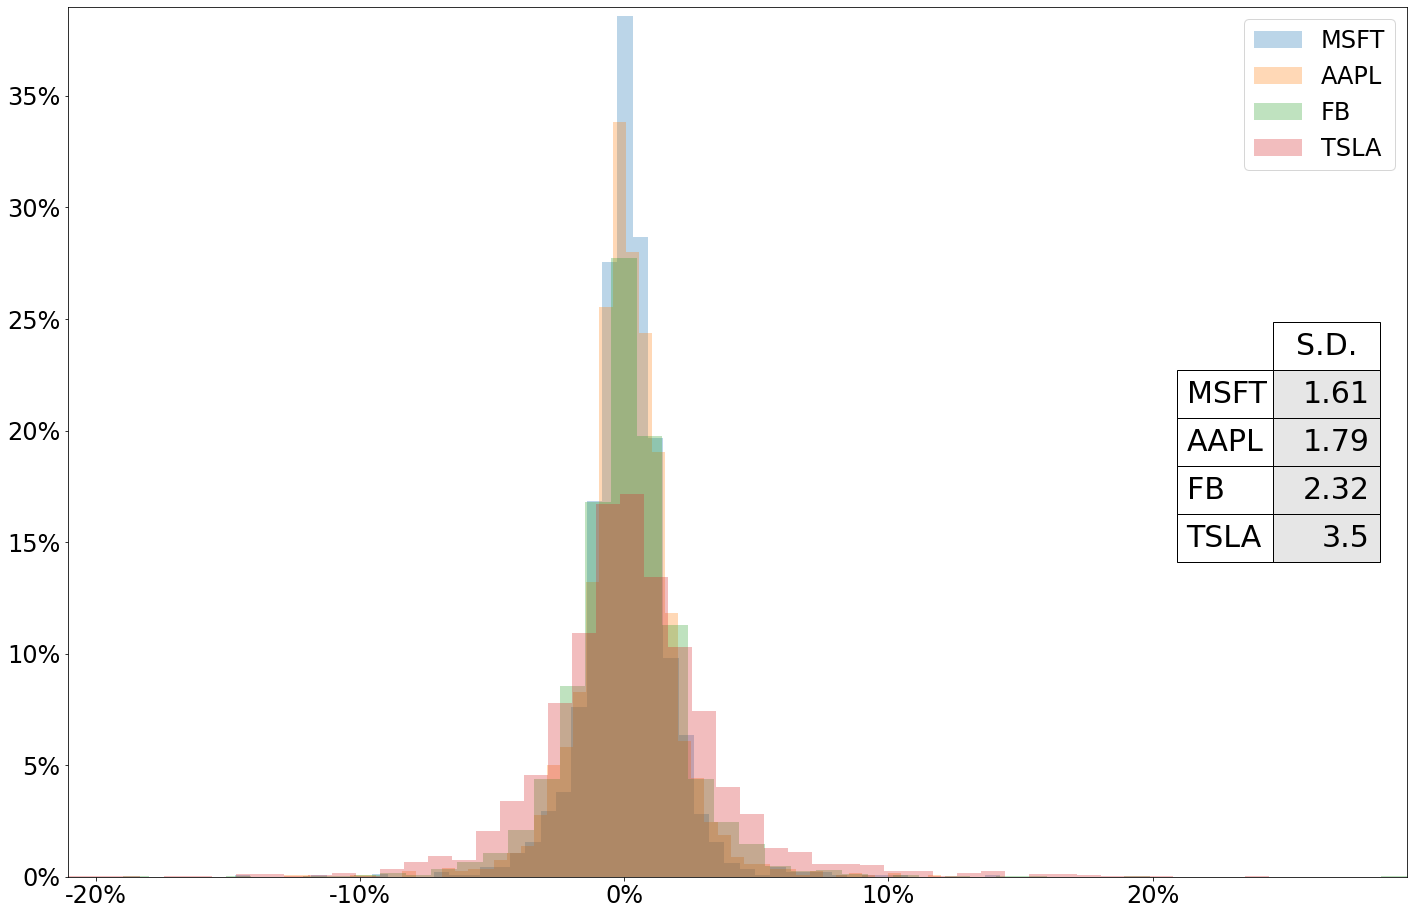

In [17]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, 
#                                 histtype = "step", 
                                alpha = .3, 
                                label = key, 
                                linewidth = 10, 
                                density = True)
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])
stats =table(ax, 
             stats_df.loc["S.D."], 
             colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, 
             loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()